In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
features = pd.read_csv('907.csv')
features = features.sort_values(['TIME'])
features = features.reset_index()
features = features[['SPEED', 'HOUR', 'DAY_OF_WEEK', 'MONTH']]
labels = np.array(features['SPEED'])
features = features.drop('SPEED', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [3]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
for i in range(len(test_labels)):
    if (test_labels[i] == 0):
        test_labels[i] = 1

In [4]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (30221, 3)
Training Labels Shape: (30221,)
Testing Features Shape: (10074, 3)
Testing Labels Shape: (10074,)


In [5]:
baseline_errors = abs(20.43 - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  3.46


In [6]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [7]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.42 degrees.


In [8]:
mape = 100 * (errors / test_labels)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[ 8.0823218  21.12396657  2.0018751  ... 18.61092749  9.33403722
  9.85512341]
Accuracy: 86.22 %.


In [9]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree907.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree907.dot')
# Write graph to a png file
graph.write_png('tree907.png')

In [10]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree907.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree907.dot')
graph.write_png('small_tree907.png');

In [11]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: HOUR                 Importance: 0.78
Variable: DAY_OF_WEEK          Importance: 0.11
Variable: MONTH                Importance: 0.11


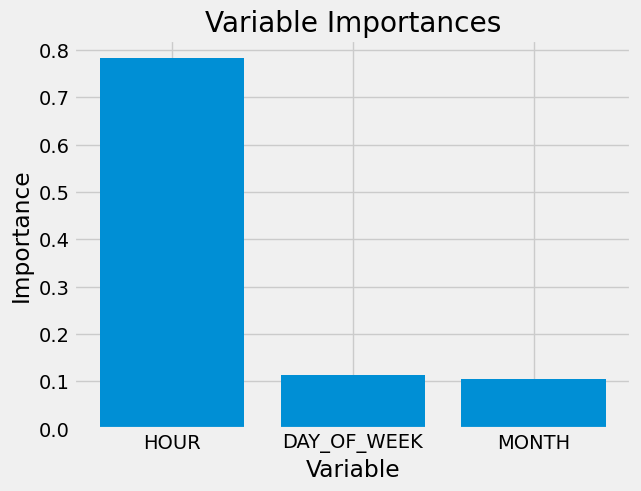

In [12]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='horizontal')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Text(0.5, 1.0, 'Prediction vs Actual for first 100 test points')

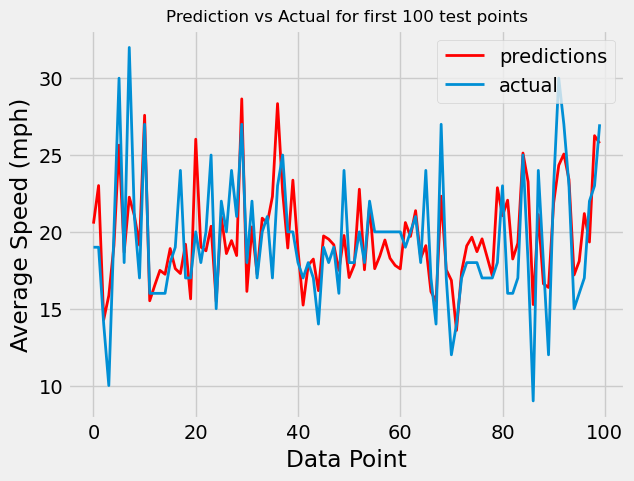

In [45]:
new_labels = test_labels[0:100]
new_predictions = predictions[0:100]
x = np.arange(200)
plt.plot(new_predictions, c = 'red', linewidth = 2, label = 'predictions')
plt.plot(new_labels, linewidth = 2, label = 'actual')
plt.legend(loc = "upper right")
plt.xlabel("Data Point")
plt.ylabel("Average Speed (mph)")
plt.title("Prediction vs Actual for first 100 test points", size = "12")

In [14]:
test_features

array([[21,  4,  9],
       [22,  4, 12],
       [15,  7,  3],
       ...,
       [13,  3,  8],
       [20,  3, 10],
       [10,  7,  1]])

In [32]:
list_day_M = []
list_day_T = []
list_day_W = []
list_day_Th = []
list_day_F = []
list_day_Sa = []
list_day_Su = []
for i in range(25):
    predicted = rf.predict([[i,1,1]])
    list_day_M.append(predicted)  
for i in range(25):
    predicted = rf.predict([[i,2,1]])
    list_day_T.append(predicted) 
for i in range(25):
    predicted = rf.predict([[i,3,1]])
    list_day_W.append(predicted) 
for i in range(25):
    predicted = rf.predict([[i,4,1]])
    list_day_Th.append(predicted) 
for i in range(25):
    predicted = rf.predict([[i,5,1]])
    list_day_F.append(predicted) 
for i in range(25):
    predicted = rf.predict([[i,6,1]])
    list_day_Sa.append(predicted) 
for i in range(25):
    predicted = rf.predict([[i,7,1]])
    list_day_Su.append(predicted) 

Text(0.5, 1.0, 'Average Speed throughout the day for work days')

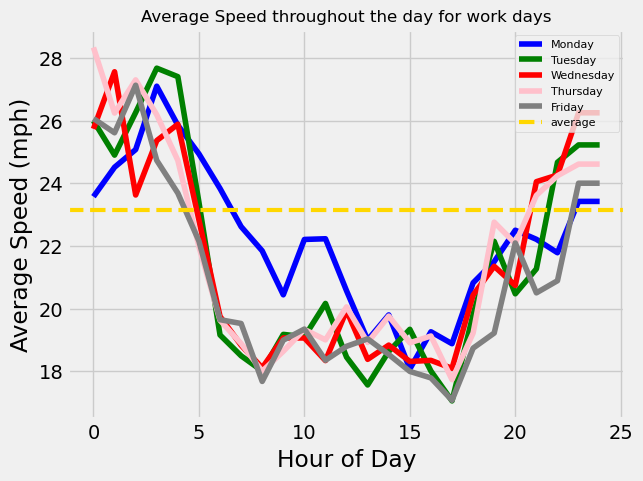

In [92]:
plt.plot(list_day_M, color = "blue", label = "Monday")
plt.plot(list_day_T, color = "green", label = "Tuesday")
plt.plot(list_day_W, color = "red", label = "Wednesday")
plt.plot(list_day_Th, color = "pink", label = "Thursday")
plt.plot(list_day_F, color = "gray", label = "Friday")
plt.axhline(y = 23.15, color = "gold", linestyle = "--", linewidth = "3", label = "average")
plt.legend(loc = "upper right", prop={'size': 8})
plt.xlabel("Hour of Day")
plt.ylabel("Average Speed (mph)")
plt.title("Average Speed throughout the day for work days", size = "12")

In [71]:
def time_lost_func(list1, avg, length):
    time_lost = []
    for i in range (25):
        if (list1[i] < avg):
            time_lost.append(list1[i])
    time_lost_2 = 0
    for i in range (len(time_lost)):
        x = (length)/(time_lost[i]) - (length)/(avg)
        time_lost_2 += x
    return(time_lost_2/len(time_lost))

In [87]:
time_lost_M = time_lost_func(list_day_M, 23.14716671, 0.6)
time_lost_T = time_lost_func(list_day_T, 23.14716671, 0.6)
time_lost_W = time_lost_func(list_day_W, 23.14716671, 0.6)
time_lost_Th = time_lost_func(list_day_Th, 23.14716671, 0.6)
time_lost_F = time_lost_func(list_day_F, 23.14716671, 0.6)

[0.00298384]
[0.005509]
[0.00513866]
[0.00479743]
[0.00541494]


In [86]:
count = 0
for i in range (25):
    count += list_day_M[i] 
print(count/24)

[23.14716671]
